# Проект: Обучение с учителем: качество модели

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Цель исследования:** Разработать персонализированное решение для увеличения покупательской активности постоянных клиентов интернет-магазина, используя прогнозирование вероятности снижения активности и сегментацию покупателей.

**Задачи исследования:**  

1. Построить модель для прогнозирования вероятности снижения покупательской активности клиентов.  
2. Выполнить сбор, предобработку и исследовательский анализ данных.  
3. Обучить и сравнить несколько моделей классификации, выбрать лучшую.  
4. Провести анализ значимости признаков и выявить ключевые факторы.  
5. Выполнить сегментацию клиентов и предложить меры для повышения их активности.  

**Описание данных**:  

**market_file.csv** - данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.  
- id — номер покупателя в корпоративной базе данных.  
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».  
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».  
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.  
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.  
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.  
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.  
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.  
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.  
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.  
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.  
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.  
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.  

**market_money.csv** - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.  
- id — номер покупателя в корпоративной базе данных.  
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.  
- Выручка — сумма выручки за период. 

**market_money.csv** - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.  
- id — номер покупателя в корпоративной базе данных.  
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.  
- Выручка — сумма выручки за период.  

**money.csv** - данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.  
- Прибыль — значение прибыли.  

## Загрузка данных

In [1]:
# импорт используемых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from phik import resources
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (OneHotEncoder, 
                                   OrdinalEncoder, 
                                   StandardScaler, 
                                   MinMaxScaler)
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             precision_score, 
                             recall_score,
                             roc_auc_score, 
                             f1_score)
from sklearn.model_selection import RandomizedSearchCV
import shap
import warnings
from sklearn.cluster import KMeans

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# загрузка даатсетов

market = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep = ';', decimal = ',')

In [4]:
# функция для получения базовой информации о датасетах

def get_info(df):
    print("Размер датасета:", df.shape, sep='\n', end='\n\n')
    display(df)
    print('\n')
    display(df.info())
    print('\n')
    display(df.describe().T)
    print("Количество пропусков:", df.isna().sum(), sep='\n', end='\n\n')
    print("Количество явных дубликатов:", df.duplicated().sum(), end='\n\n')
    display(df[df.duplicated() == True])

In [5]:
get_info(market)

Размер датасета:
(1300, 13)



,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса              

None

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
Маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


Количество пропусков:
id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

Количество явных дубликатов: 0



,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит


Пропуски и дубликаты в market отсутствуют. Типы данных соответствуют представленным.  

*P.S. Проверку на неявные дубликаты выполним в блоке с предобработкой, когда приведем данные к единому виду.*

In [6]:
get_info(market_money)

Размер датасета:
(3900, 3)



,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2


Количество пропусков:
id         0
Период     0
Выручка    0
dtype: int64

Количество явных дубликатов: 0



,id,Период,Выручка


Пропуски и дубликаты в market_money отсутствуют. Типы данных соответствуют представленным. 

*P.S. Проверку на неявные дубликаты выполним в блоке с предобработкой, когда приведем данные к единому виду.*

In [7]:
get_info(market_time)

Размер датасета:
(2600, 3)



,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


Количество пропусков:
id        0
Период    0
минут     0
dtype: int64

Количество явных дубликатов: 0



,id,Период,минут


Пропуски и дубликаты в market_time отсутствуют. Типы данных соответствуют представленным. 

*P.S. Проверку на неявные дубликаты выполним в блоке с предобработкой, когда приведем данные к единому виду.*

In [8]:
get_info(money)

Размер датасета:
(1300, 2)



,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


Количество пропусков:
id         0
Прибыль    0
dtype: int64

Количество явных дубликатов: 0



,id,Прибыль


### Вывод  

**market**:  

1300 строк, 13 столбцов

- Нет пропусков и явных дубликатов.  
- Типы данных распределены корректно: количественные признаки имеют числовой тип, категориальные — строковый.  
- Диапазоны значений количественных признаков выглядят разумно.   


- Колонка Маркет_актив_6_мес: усредненная активность клиентов за полгода. Средняя (4.25) и текущая активность (Маркет_актив_тек_мес, средняя 4.01) почти равны, что может говорить о стабильности.  
- Колонка Акционные_покупки: средняя доля покупок по акциям составляет ~0.32, важный фактор для сегментации.  
- Колонка Ошибка_сервиса: среднее количество ошибок ~4.19, разброс до 9 ошибок, что может влиять на покупательскую активность. 

**market_money:**  

3900 строк, 3 столбца  

- Нет пропусков и явных дубликатов.  
- В таблице данные о выручке за разные периоды.  
- Диапазон значений Выручка варьируется от 0 до 106862.2. Однако значение выше 100,000 кажется выбросом, так как остальные значения сгруппированы сильно ниже.  

**market_time:**  

2600 строк, 3 столбца    

- Нет пропусков и явных дубликатов.  
- Среднее значение времени, проведённом на сайте равно ~13 минут, с разбросом от 4 до 23 минут.  

**money:**  

1300 строк, 2 столбца

- Нет пропусков и явных дубликатов.  
- Минимальное значение прибыли - 0.86, максимальное - 7.43. Возможно, исчисляется в процентах?

## Предобработка данных  

Будем работать с каждым отдельным датасетом поочередно. 

### market

Для начала приведем названия столбцов к единому виду.

In [9]:
market.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

In [10]:
# функция для преобразования названий столбцов

def rename_columns(cols):
    return [col.lower().replace(' ', '_') for col in cols]

In [11]:
market.columns = rename_columns(market.columns)
market.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Явных дубликатов в датасете нет, проверим на неявные.

In [12]:
# функция для поиска уникальных значений по таблице

def find_duplicates(df, cols):
    return {col: df[col].unique() for col in cols}

In [13]:
cols_to_check = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

unique_values = find_duplicates(market, cols_to_check)

# Печать результата
for col, values in unique_values.items():
    print(f"Уникальные значения в столбце '{col}': {values}")

Уникальные значения в столбце 'покупательская_активность': ['Снизилась' 'Прежний уровень']
Уникальные значения в столбце 'тип_сервиса': ['премиум' 'стандартт' 'стандарт']
Уникальные значения в столбце 'разрешить_сообщать': ['да' 'нет']
Уникальные значения в столбце 'популярная_категория': ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Неявный дубликат присутствует в столбце 'тип_сервиса': 'стандартт'/'стандарт'. Исправим это, и заодно приведем значения к нижнему регистру и исправим опечатку в слове 'аксесуары'

In [14]:
market['тип_сервиса'] = market['тип_сервиса'].replace('стандартт', 'стандарт')

In [15]:
market = market.applymap(
    lambda x: x.lower().replace(' ', '_').replace('аксесуары', 'аксессуары') if isinstance(x, str) else x
)
unique_values = find_duplicates(market, cols_to_check)
for col, values in unique_values.items():
    print(f"Уникальные значения в столбце '{col}': {values}")

Уникальные значения в столбце 'покупательская_активность': ['снизилась' 'прежний_уровень']
Уникальные значения в столбце 'тип_сервиса': ['премиум' 'стандарт']
Уникальные значения в столбце 'разрешить_сообщать': ['да' 'нет']
Уникальные значения в столбце 'популярная_категория': ['товары_для_детей' 'домашний_текстиль' 'косметика_и_аксессуары'
 'техника_для_красоты_и_здоровья' 'кухонная_посуда'
 'мелкая_бытовая_техника_и_электроника']


### market_money

In [16]:
market_money.columns

Index(['id', 'Период', 'Выручка'], dtype='object')

In [17]:
# нижний регистр для столбцов

market_money.columns = rename_columns(market_money.columns)
market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [18]:
# проверка на неявные дубликаты

cols_to_check = ['период']

unique_values = find_duplicates(market_money, cols_to_check)

for col, values in unique_values.items():
    print(f"Уникальные значения в столбце '{col}': {values}")

Уникальные значения в столбце 'период': ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Опечатка: 'препредыдущий_месяц'/'предыдущий_месяц'. Исправим это. 

In [19]:
market_money['период'] = market_money['период'].replace('препредыдущий_месяц', 'предпредыдущий_месяц')
market_money['период'].unique()

array(['предпредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

### market_time

In [20]:
get_info(market_time)

Размер датасета:
(2600, 3)



,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


Количество пропусков:
id        0
Период    0
минут     0
dtype: int64

Количество явных дубликатов: 0



,id,Период,минут


In [21]:
market_time.columns

Index(['id', 'Период', 'минут'], dtype='object')

In [22]:
# нижний регистр для столбцов

market_time.columns = rename_columns(market_time.columns)
market_time.columns

Index(['id', 'период', 'минут'], dtype='object')

In [23]:
# проверка на неявные дубликаты

cols_to_check = ['период']

unique_values = find_duplicates(market_time, cols_to_check)

# Печать результата
for col, values in unique_values.items():
    print(f"Уникальные значения в столбце '{col}': {values}")

Уникальные значения в столбце 'период': ['текущий_месяц' 'предыдцщий_месяц']


Неявных дубликатов нет, но присутствует опечатка. Исправим ее.

In [24]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

### money

In [25]:
get_info(money)

Размер датасета:
(1300, 2)



,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


Количество пропусков:
id         0
Прибыль    0
dtype: int64

Количество явных дубликатов: 0



,id,Прибыль


### Вывод  

Данные оказались достаточно чистыми, без большого количества дубликатов и пропусков.  

Во всех датасетах данные и названия столбцов приведены к единому виду, типы данных соответствуют представленным. В датасете market обработан неявный дубликат и исправлена опечатка, в market_money исправлен неявный дубликат с опечаткой, в market_time исправлена опечатка, а в money после обработки данных не осталось дубликатов, пропуски удалены.

## Исследовательский анализ данных

Аналогично, будем анализировать каждый датасет поочередно.

### market

Начнем с количественных признаков. Их в датасете 8: маркет_актив_6_мес, маркет_актив_тек_мес, длительность, акционные_покупки, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал, ошибка_сервиса и страниц_за_визит.

#### маркет_актив_6_мес

Это среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

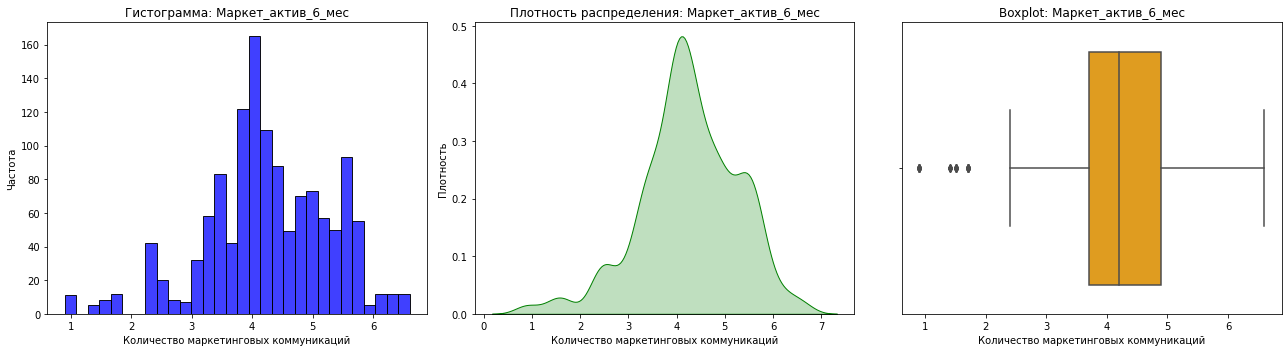

In [26]:
# функция для построения 3 видов графиков

def visualize_marketing_activity(data, column):

    plt.figure(figsize=(18, 5))
    
    # гистограмма
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], bins=30, kde=False, color='blue')
    plt.title("Гистограмма: Маркет_актив_6_мес")
    plt.xlabel("Количество маркетинговых коммуникаций")
    plt.ylabel("Частота")

    # KDE (плотность распределения)
    plt.subplot(1, 3, 2)
    sns.kdeplot(data[column], color='green', fill=True)
    plt.title("Плотность распределения: Маркет_актив_6_мес")
    plt.xlabel("Количество маркетинговых коммуникаций")
    plt.ylabel("Плотность")

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[column], color='orange')
    plt.title("Boxplot: Маркет_актив_6_мес")
    plt.xlabel("Количество маркетинговых коммуникаций")

    plt.tight_layout()
    plt.show()

visualize_marketing_activity(data=market, column='маркет_актив_6_мес')

Распределение ассиметричное и приближается к нормальному, но с некоторым смещением вправо. Есть пик значений около 4 коммуникаций на покупателя, а затем плавное снижение частоты с увеличением количества коммуникаций. Наблюдаются несколько выбросов слева, но их немного.  

График плотности распределения подтверждает выводы гистограммы, показывая, что наиболее вероятное значение количества коммуникаций находится в диапазоне 3.5-4.5. Плавное снижение плотности вправо указывает на то, что очень высокие значения количества коммуникаций встречаются редко.  

Ящик с усами подтверждает наличие нескольких выбросов слева (значения за пределами первого квантиля). Медиана находится примерно около 4, что согласуется с гистограммой и графиком плотности распределения.

Средняя маркетинговая активность - самая часто встречающаяся. Около 300 случаев высокой активности, и совсем немного низкой.

#### маркет_актив_тек_мес	

Это количество маркетинговых коммуникаций в текущем месяце.

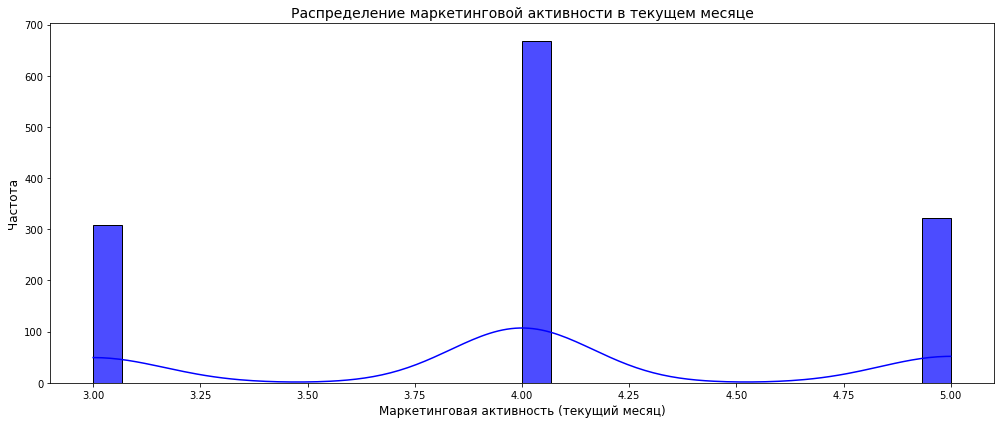

In [27]:
def visualize_current_month_activity(data, column):
   
    plt.figure(figsize=(14, 6))
    
    sns.histplot(data[column], bins=30, kde=True, color='blue', alpha=0.7)
    plt.title("Распределение маркетинговой активности в текущем месяце", fontsize=14)
    plt.xlabel("Маркетинговая активность (текущий месяц)", fontsize=12)
    plt.ylabel("Частота", fontsize=12)
    
    plt.tight_layout()
    plt.show()

visualize_current_month_activity(market, "маркет_актив_тек_мес")

Возможных значений всего три - 3, 4 и 5.

Опять жн, средняя маркетинговая активность - самая частая. Низкая и высокая встречаются практически одинаково часто - около 300 случаев на каждую. 

#### длительность

Это значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

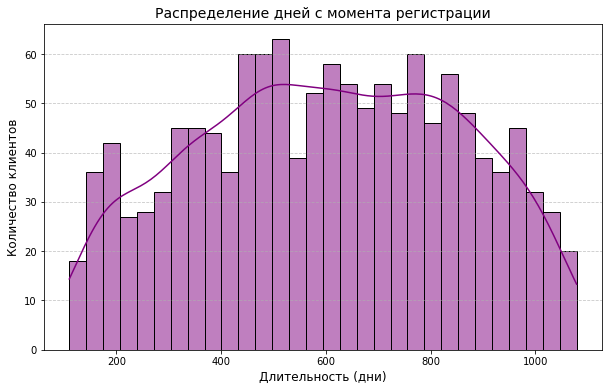

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=market, x="длительность", kde=True, color="purple", bins=30)
plt.title("Распределение дней с момента регистрации", fontsize=14)
plt.xlabel("Длительность (дни)", fontsize=12)
plt.ylabel("Количество клиентов", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0.5, 0, 'Длительность (дни)')

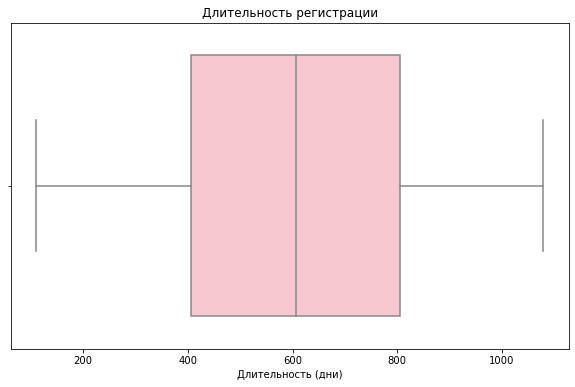

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=market['длительность'], color='pink')
plt.title("Длительность регистрации")
plt.xlabel("Длительность (дни)")

Распределение похоже на равномерное с небольшим пиком в середине: большое количество пользователей зарегистрированы на сайте чуть больше года. В целом, на сайте регистрировались раньше, и примерно в таких же темпах регистрируются и сейчас. 

#### акционные_покупки

Это среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

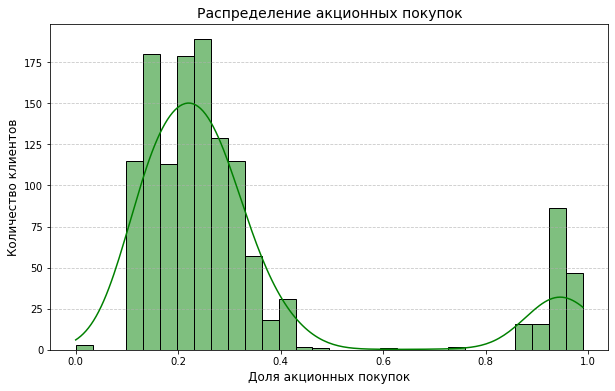

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=market, x="акционные_покупки", kde=True, color="green", bins=30)
plt.title("Распределение акционных покупок", fontsize=14)
plt.xlabel("Доля акционных покупок", fontsize=12)
plt.ylabel("Количество клиентов", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

По гистограмме видно, что распределение разделилось на две части. Предлагаю разделить признак на низкое и высокое значение акционных покупок. 

In [31]:
market['акционные_покупки_категория'] = market['акционные_покупки'].apply(
    lambda x: 'высокая' if x > 0.7 else 'низкая'
)
market

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_категория
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5,низкая
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,высокая
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,низкая
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,высокая
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,высокая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,прежний_уровень,стандарт,да,6.6,3,318,0.24,техника_для_красоты_и_здоровья,5,3,3,11,низкая
1296,216644,прежний_уровень,стандарт,нет,5.1,4,454,0.21,домашний_текстиль,6,2,3,9,низкая
1297,216645,прежний_уровень,стандарт,да,4.1,3,586,0.20,домашний_текстиль,3,2,5,7,низкая
1298,216646,прежний_уровень,стандарт,да,6.3,5,645,0.12,техника_для_красоты_и_здоровья,3,3,5,7,низкая


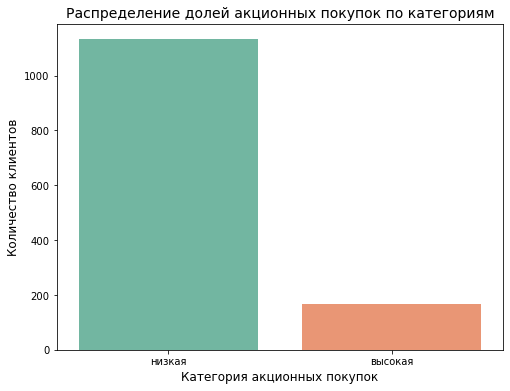

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=market, x='акционные_покупки_категория', palette='Set2')

plt.title('Распределение долей акционных покупок по категориям', fontsize=14)
plt.xlabel('Категория акционных покупок', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

plt.show()

Покупатели явно не обращают особого внимания на акции во время покупок.

#### средний_просмотр_категорий_за_визит

Данный признак показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

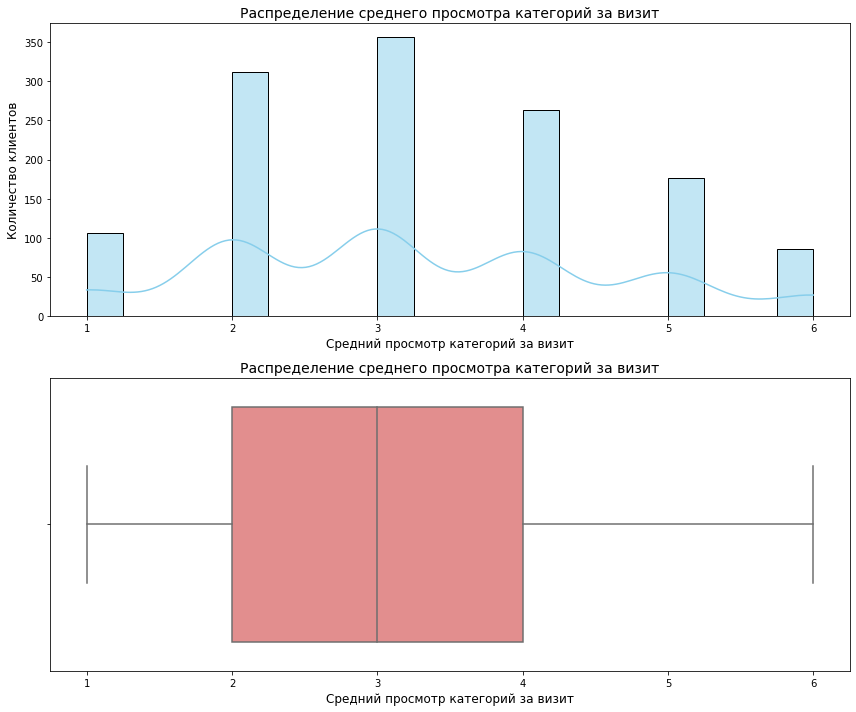

In [33]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)  
sns.histplot(data=market, x='средний_просмотр_категорий_за_визит', kde=True, bins=20, color='skyblue')
plt.title('Распределение среднего просмотра категорий за визит', fontsize=14)
plt.xlabel('Средний просмотр категорий за визит', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

plt.subplot(2, 1, 2)  
sns.boxplot(data=market, x='средний_просмотр_категорий_за_визит', color='lightcoral')
plt.title('Распределение среднего просмотра категорий за визит', fontsize=14)
plt.xlabel('Средний просмотр категорий за визит', fontsize=12)

plt.tight_layout()
plt.show()

Распределение нормальное, с двигом влево. В среднем покупатели просматривают от 2 до 4 категорий за визит. 

#### неоплаченные_продукты_штук_квартал

Отражает общее число неоплаченных товаров в корзине за последние 3 месяца.

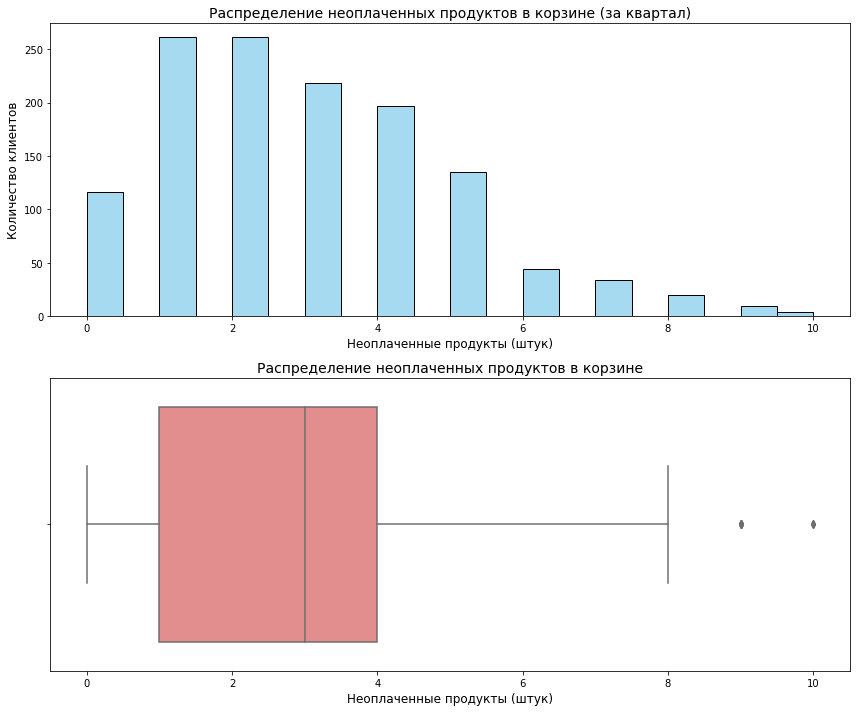

In [34]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)  
sns.histplot(data=market, x='неоплаченные_продукты_штук_квартал', kde=False, bins=20, color='skyblue')
plt.title('Распределение неоплаченных продуктов в корзине (за квартал)', fontsize=14)
plt.xlabel('Неоплаченные продукты (штук)', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

plt.subplot(2, 1, 2)  
sns.boxplot(data=market, x='неоплаченные_продукты_штук_квартал', color='lightcoral')
plt.title('Распределение неоплаченных продуктов в корзине', fontsize=14)
plt.xlabel('Неоплаченные продукты (штук)', fontsize=12)

plt.tight_layout()
plt.show()

Явный сдвиг влево, видимо, покупатели чаще всего пользуются сайтом для покупки товара здесь и сейчас без добавления большого количества продуктов в корзину. Есть выбросы, где товаров в корзине 9-10 штук, но их немного. 

Большинство клиентов имеют среднее (от 2 до 5) количество неоплаченных продуктов в корзине, заметное количество не имеет или имеет 1 неоплаченный товар и совсем небольшая группа клиентов имеет более 5 неоплаченных продуктов в корзине.

#### ошибка_сервиса

Отражает число сбоев, которые коснулись покупателя во время посещения сайта.

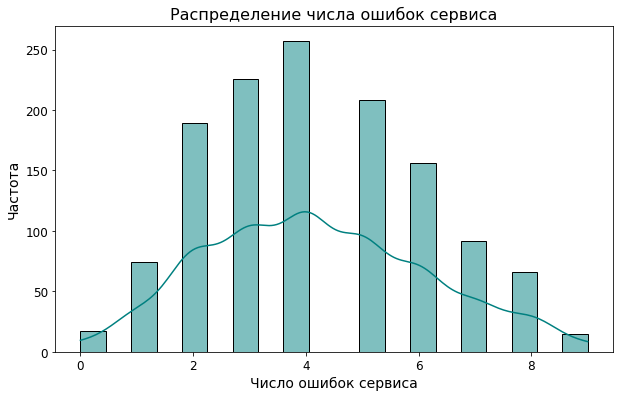

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=market, x='ошибка_сервиса', bins=20, kde=True, color='teal')
plt.title('Распределение числа ошибок сервиса', fontsize=16)
plt.xlabel('Число ошибок сервиса', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Распаределение походит на нормальное.

Можно сделать вывод, что бОльшая часть аудитории сайта сталкивается со средним числом сбоев (от 2 до 5). Также значительная часть столкнулась со сбоями более 5 раз, что может быть препятствием для выбора именно этой компании. 

#### страниц_за_визит

Данный признак отражает среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

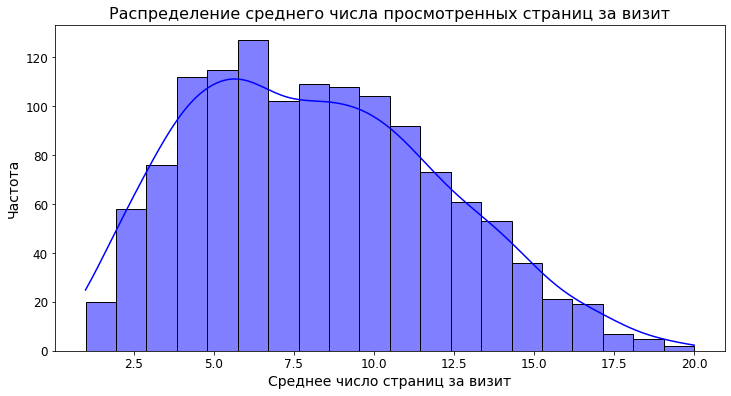

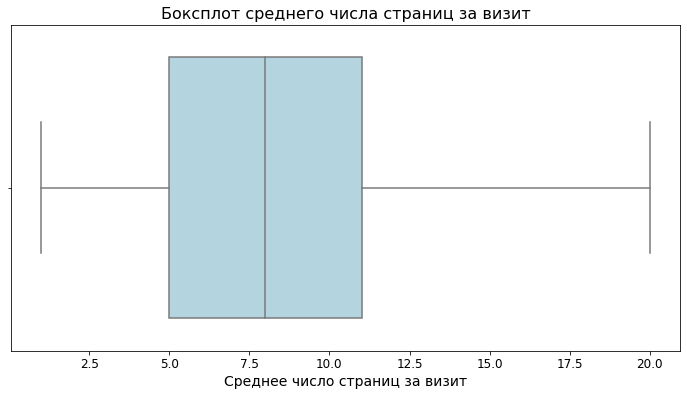

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(data=market, x='страниц_за_визит', bins=20, kde=True, color='blue')
plt.title('Распределение среднего числа просмотренных страниц за визит', fontsize=16)
plt.xlabel('Среднее число страниц за визит', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=market, x='страниц_за_визит', color='lightblue')
plt.title('Боксплот среднего числа страниц за визит', fontsize=16)
plt.xlabel('Среднее число страниц за визит', fontsize=14)
plt.xticks(fontsize=12)
plt.show()

В среднем пользователи просматривают от 5 до 11 страниц за одно посещение сайта.

Начнем рассматривать категориальные признаки. 

#### категориальные признаки market

In [37]:
def plot_categorical_feature(data, feature, title, xlabel, ylabel, color_palette="pastel"):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=feature, palette=color_palette)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

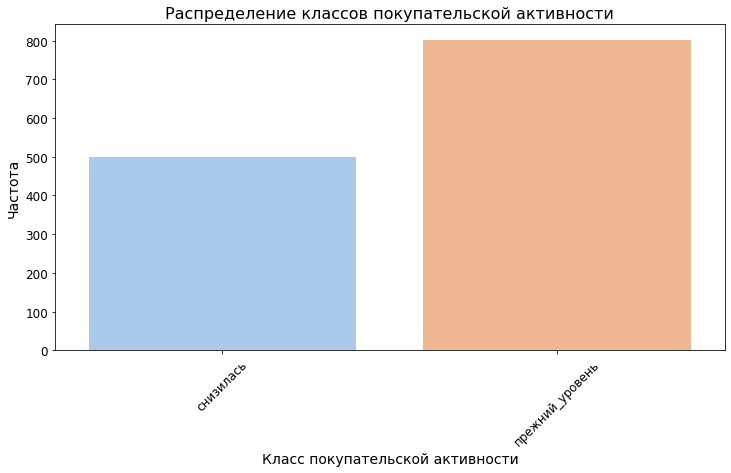

In [38]:
# покупательская активность
plot_categorical_feature(
    market, 
    feature='покупательская_активность', 
    title='Распределение классов покупательской активности', 
    xlabel='Класс покупательской активности', 
    ylabel='Частота'
)

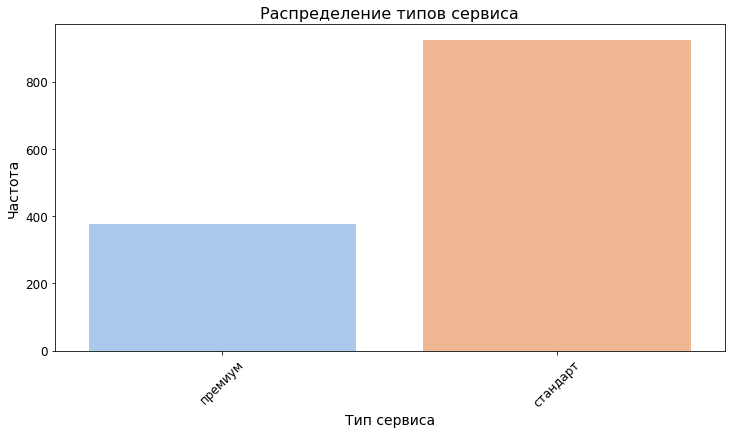

In [39]:
# тип сервиса
plot_categorical_feature(
    market, 
    feature='тип_сервиса', 
    title='Распределение типов сервиса', 
    xlabel='Тип сервиса', 
    ylabel='Частота'
)

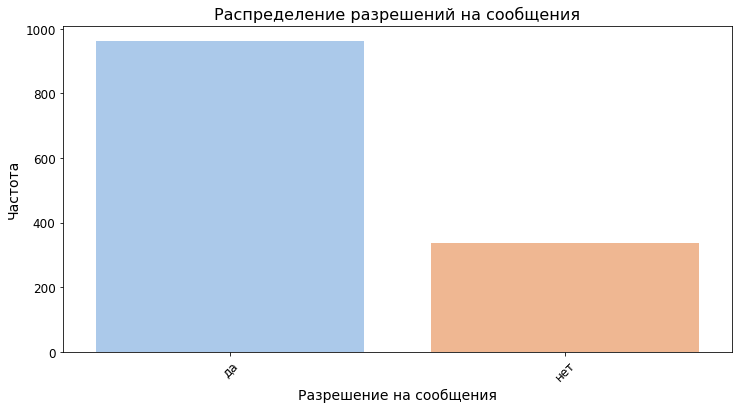

In [40]:
# разрешить сообщать
plot_categorical_feature(
    market, 
    feature='разрешить_сообщать', 
    title='Распределение разрешений на сообщения', 
    xlabel='Разрешение на сообщения', 
    ylabel='Частота'
)

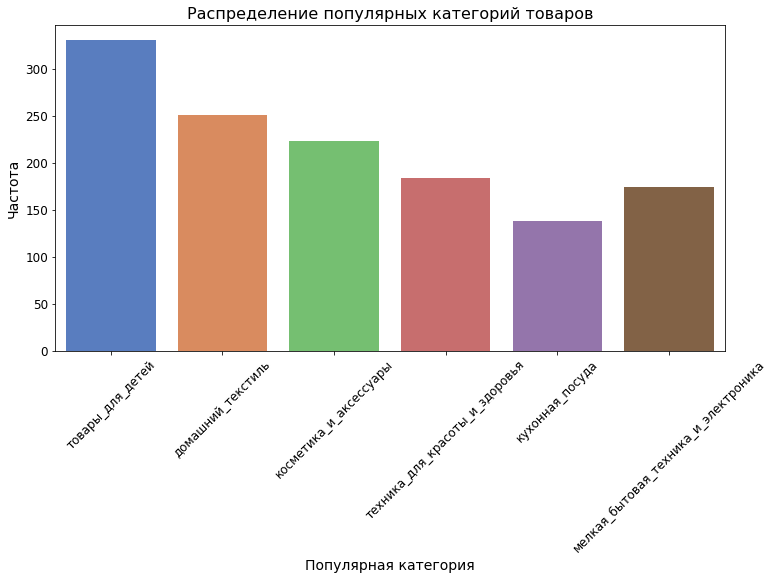

In [41]:
# популярная категория
plot_categorical_feature(
    market, 
    feature='популярная_категория', 
    title='Распределение популярных категорий товаров', 
    xlabel='Популярная категория', 
    ylabel='Частота',
    color_palette="muted"
)

У большинства клиентов покупательская активность осталась на прежнем уровне, однако у половины от тех, кто остался, активность снизилась. В два раза большее количество покупателей пользуются стандартным тарифом. Подавляющее большинство дало разрешение на получение рассылки, а самой популярной категорией товаров оказались товары для детей. За ними следуют домашний текстиль и косметика, а вот кухонная посуда популярностью не пользуется.

### market_money

Продолжим рассматривать признаки уже в таблице market_money. В ней хранятся данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Для начала проанализируем выручку. 

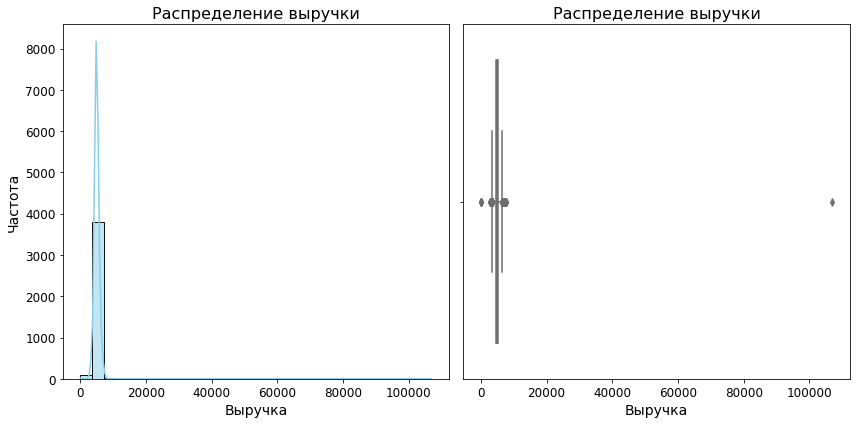

In [42]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=market_money, x='выручка', kde=True, bins=30, color='skyblue')
plt.title('Распределение выручки', fontsize=16)
plt.xlabel('Выручка', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(data=market_money, x='выручка', color='lightcoral')
plt.title('Распределение выручки', fontsize=16)
plt.xlabel('Выручка', fontsize=14)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.show()

В данных явно присутствует выброс. Проверим.

In [43]:
market_money['выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [44]:
market_money.query('выручка > 10000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


Проверим, является ли значение аномальным или кто-то из покупателей действительно совершил покупку на сумму более 100 тысяч. Если это так, то прибыль магазина от этого клиента будет сильно разниться от медианы. 

In [45]:
money['Прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

In [46]:
money[money['id'] == 215380]

,id,Прибыль
32,215380,3.88


Прибыль клиента близка к медианному значению. Значит, это выброс. Заменим на выручку предыдущего месяца. .

In [47]:
prev_revenue = market_money.loc[
    (market_money['id'] == 215380) & (market_money['период'] == 'предыдущий_месяц'),
    'выручка'
].values[0]

In [48]:
market_money.loc[
    (market_money['id'] == 215380) & (market_money['период'] == 'текущий_месяц'),
    'выручка'
] = prev_revenue

In [49]:
market_money[market_money['id'] == 215380]

,id,период,выручка
96,215380,предпредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,6077.0


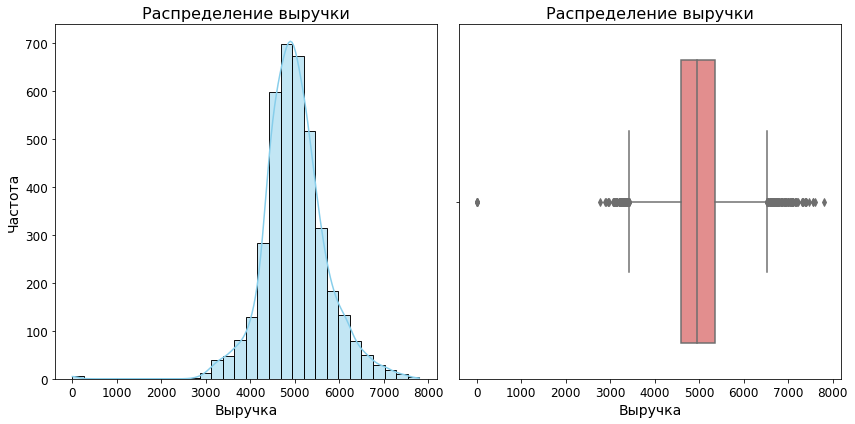

In [50]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=market_money, x='выручка', kde=True, bins=30, color='skyblue')
plt.title('Распределение выручки', fontsize=16)
plt.xlabel('Выручка', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(data=market_money, x='выручка', color='lightcoral')
plt.title('Распределение выручки', fontsize=16)
plt.xlabel('Выручка', fontsize=14)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.show()

Средняя выручка составляет 4500-5500 у.е. Есть выбросы меньше 3000 и больше 7000, но это логично, ведь клиенты могут совершать как небольшие, так и крупные покупки. 

Проанализируем, в каком объеме данные разделены по периодам.

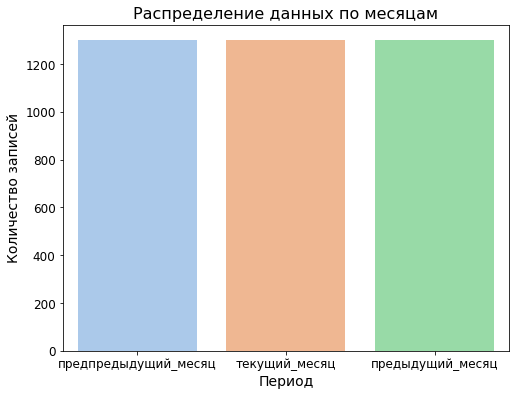

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=market_money, x='период', palette='pastel')

plt.title('Распределение данных по месяцам', fontsize=16)
plt.xlabel('Период', fontsize=14)
plt.ylabel('Количество записей', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Данные представлены в равном объеме. 

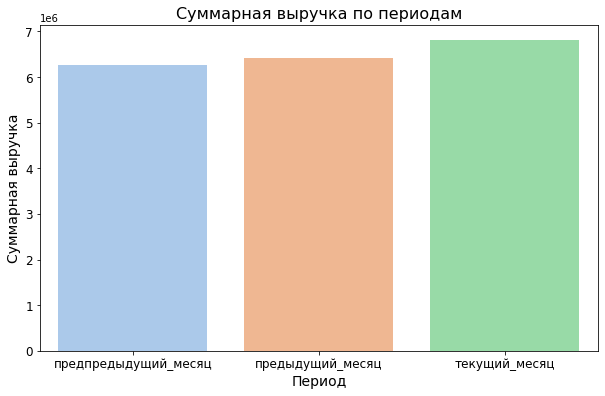

In [52]:
revenue_by_period = market_money.groupby('период')['выручка'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_period, x='период', y='выручка', palette='pastel')

plt.title('Суммарная выручка по периодам', fontsize=16)
plt.xlabel('Период', fontsize=14)
plt.ylabel('Суммарная выручка', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Анализируя выручку по месяцам, можно сделать вывод, что она остается на примерно равном уровне с тенденцией небольшого роста.

### market_time

Проанализируем данные в таблице market_time, в которой хранятся данные о времени (в минутах), которое покупатель провёл на сайте в течение периода. Начнем с анализа времени. 

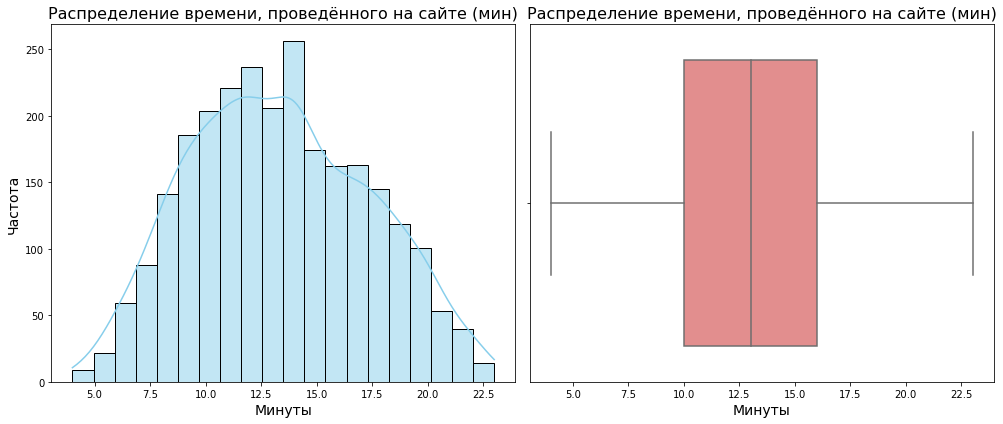

In [53]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=market_time, x='минут', kde=True, bins=20, color='skyblue')
plt.title('Распределение времени, проведённого на сайте (мин)', fontsize=16)
plt.xlabel('Минуты', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(data=market_time, x='минут', color='lightcoral')
plt.title('Распределение времени, проведённого на сайте (мин)', fontsize=16)
plt.xlabel('Минуты', fontsize=14)

plt.tight_layout()
plt.show()

Распределение является нормальным со средним временем, проведенным на сайте, около 13 минут. Теперь посмотрим как данные о времени распределены по периодам. 

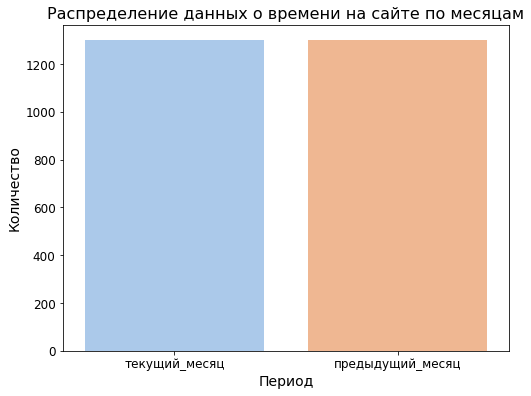

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(data=market_time, x='период', palette='pastel')

plt.title('Распределение данных о времени на сайте по месяцам', fontsize=16)
plt.xlabel('Период', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Данные распределены в равных количествах. Посмотрим сколько времени пользователи проводили на сайте в текущем и предыдущем месяцах. 

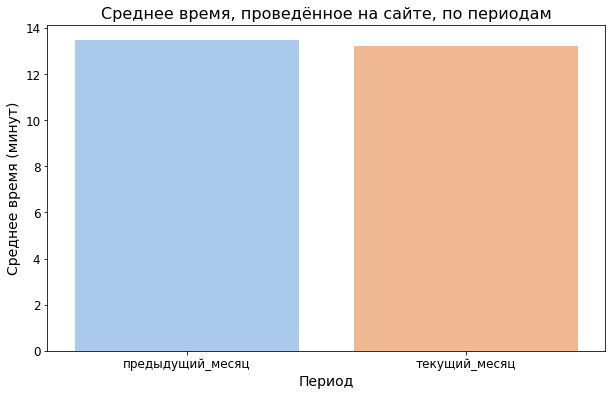

In [55]:
avg_minutes_by_period = market_time.groupby('период')['минут'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_minutes_by_period, x='период', y='минут', palette='pastel')
plt.title('Среднее время, проведённое на сайте, по периодам', fontsize=16)
plt.xlabel('Период', fontsize=14)
plt.ylabel('Среднее время (минут)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Пользователи провели практически одинаковое время на сайте и в прошлом, и в текущем месяце. 

### money

Перейдем к анализу последней таблицы money. В ней собраны данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Провизуализируем единственный количественный признак - прибыль. 

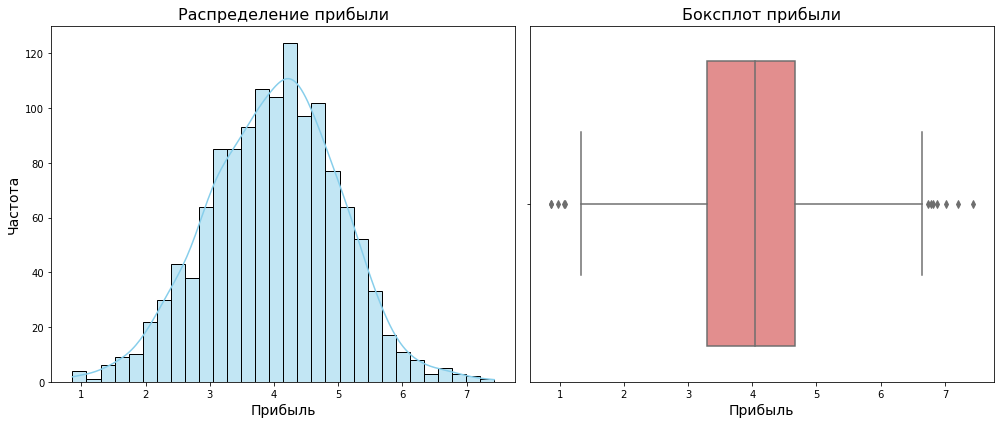

In [56]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=money, x='Прибыль', kde=True, bins=30, color='skyblue')
plt.title('Распределение прибыли', fontsize=16)
plt.xlabel('Прибыль', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(data=money, x='Прибыль', color='lightcoral')
plt.title('Боксплот прибыли', fontsize=16)
plt.xlabel('Прибыль', fontsize=14)

plt.tight_layout()
plt.show()

Распределение прибыли относительно симметрично, но с небольшим правым перекосом. Большинство покупателей приносят прибыль в диапазоне 3.3 - 4.7, что подтверждается медианой.

### Отбор клиентов с покупательской активностью не менее трёх месяцев

Чтобы отобрать активных за последний квартал покупателей, необходимо обратиться к таблице money. В столбце прибыль минимальное значение = 1, то есть в money собраны все клиенты, которые приносили прибыль в последние три месяца. Отберем данные по этим индексам.

In [57]:
# считаем количество месяцев с ненулевой выручкой для каждого клиента
active_clients = (
    market_money[market_money['выручка'] > 0]
    .groupby('id')['период']
    .nunique()
)

# оставляем тех, кто был активен все 3 месяца
valid_clients = active_clients[active_clients == 3].index

# фильтруем, оставляя только активных клиентов
market_money = market_money[market_money['id'].isin(valid_clients)]

In [58]:
market = market[market['id'].isin(valid_clients)]
market_time = market_time[market_time['id'].isin(valid_clients)]
money = money[money['id'].isin(valid_clients)]

In [59]:
get_info(market_money)

Размер датасета:
(3891, 3)



,id,период,выручка
3,215349,предпредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,предпредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
...,...,...,...
3895,216646,предпредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,предпредыдущий_месяц,5183.0




<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   период   3891 non-null   object 
 2   выручка  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,3891.0,215998.986893,374.482249,215349.0,215675.0,215999.0,216323.0,216647.0
выручка,3891.0,5007.816757,679.364798,2758.7,4592.0,4959.0,5363.2,7799.4


Количество пропусков:
id         0
период     0
выручка    0
dtype: int64

Количество явных дубликатов: 0



,id,период,выручка


В датасете осталось 3891 строки, где все пользователи были активными последние три месяца. Неактивными оказались 109 пользователей. 

### Вывод

В результате проведенного исследовательского анализа данных, можно прийти к следующим выводам:  

- Большинство клиентов демонстрируют средний уровень маркетинговой активности как за последние 6 месяцев, так и в текущем месяце. Высокая активность встречается реже, а низкая — почти отсутствует.  
- Большинство пользователей зарегистрированы на сайте более года, что указывает на зрелость клиентской базы. Регистрация новых пользователей продолжается равномерно.  
- Клиенты редко делают покупки по акциям, что может говорить о недостаточной эффективности акционных предложений или низкой заинтересованности аудитории.  
- В среднем пользователи просматривают от 2 до 4 категорий товаров за визит, а количество неоплаченных товаров в корзине для большинства клиентов находится в диапазоне от 2 до 5. Большинство клиентов просматривают 5-11 страниц за визит.  
- Около половины клиентов сталкивались со средним числом сбоев (2-5), а значительная часть — с высоким числом (более 5). Это может негативно влиять на пользовательский опыт и лояльность.  
- У большинства клиентов активность остается на прежнем уровне, хотя часть аудитории демонстрирует снижение. Товары для детей оказались самой популярной категорией, за ними следуют домашний текстиль и косметика.  
- Средняя выручка составляет 4500-5500 у.е. Наблюдаются выбросы, что объясняется различиями в размере покупок.  
- Среднее время составляет около 13 минут, распределение является нормальным. Временные показатели равномерно распределены между текущим и предыдущим месяцами.  
- Для большинства клиентов прибыль распределена равномерно.  

Также в ходе анализа были добавлены новые категориальные признаки, а также отфильтрованы пользователи, активные в предыдущие квартал. 

No handles with labels found to put in legend.


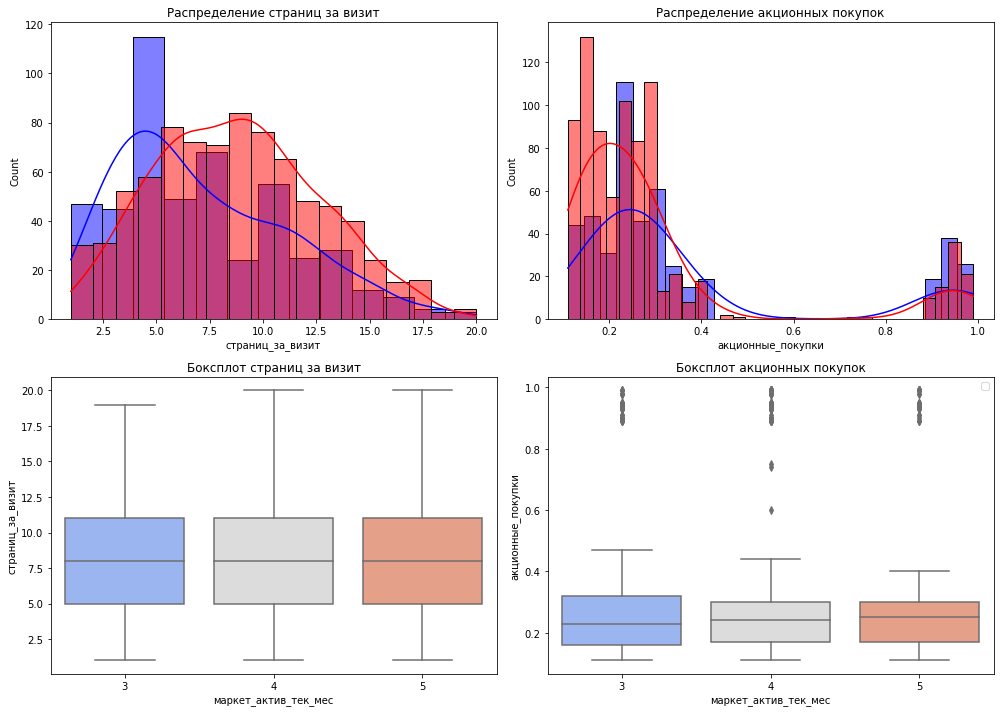

In [60]:
# группы по активности
active_users = market[market['маркет_актив_тек_мес'] > market['маркет_актив_6_мес']]
inactive_users = market[market['маркет_актив_тек_мес'] <= market['маркет_актив_6_мес']]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(active_users['страниц_за_визит'], kde=True, color='blue', ax=axes[0, 0])
sns.histplot(inactive_users['страниц_за_визит'], kde=True, color='red', ax=axes[0, 0])
axes[0, 0].set_title('Распределение страниц за визит')

sns.histplot(active_users['акционные_покупки'], kde=True, color='blue', ax=axes[0, 1])
sns.histplot(inactive_users['акционные_покупки'], kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Распределение акционных покупок')

# Боксплоты
sns.boxplot(x='маркет_актив_тек_мес', y='страниц_за_визит', data=market, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Боксплот страниц за визит')

sns.boxplot(x='маркет_актив_тек_мес', y='акционные_покупки', data=market, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Боксплот акционных покупок')

plt.tight_layout()
plt.legend()
plt.show()

- Неактивные пользователи чаще смотрят больше страниц за визит, но это не означает вовлеченность — скорее, они могут дольше искать нужное.  
- У неактивных выше доля крайних значений по акционным покупкам, что может означать, что часть из них либо полностью игнорирует акции, либо покупает только по акциям.  
- Средние значения метрик у активных и неактивных пользователей схожи, но у неактивных более широкий разброс, больше выбросов. Это может говорить о том, что снижение активности связано либо с неудовлетворенностью, либо с изменением привычек пользователя (например, перешел в режим покупки только по акциям).

Большинство пользователей — зарегистрированные более года клиенты со средним уровнем маркетинговой активности, которые просматривают 5-11 страниц за визит, посещают 2-4 категории товаров и редко совершают акционные покупки. Их средний чек составляет 4500-5500 у.е., а наиболее популярные категории — товары для детей, домашний текстиль и косметика.  

В целом, основная аудитория стабильна, но есть группа пользователей, чья активность снижается, возможно, из-за неудовлетворенности опытом или переключения на акционные покупки.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


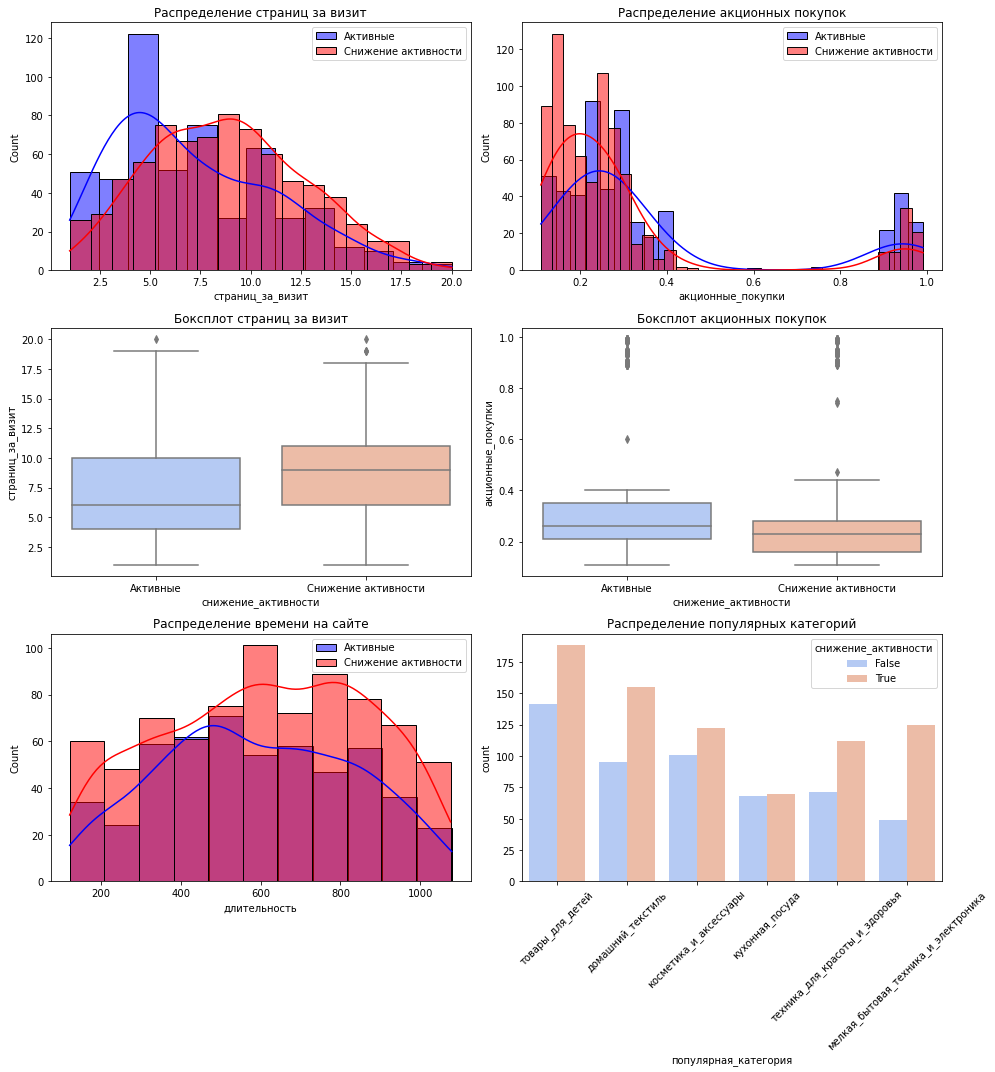

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Определяем снижение активности
market['снижение_активности'] = market['маркет_актив_тек_мес'] < market['маркет_актив_6_мес']

# Группировка по снижению активности
active_users = market[market['снижение_активности'] == False]
inactive_users = market[market['снижение_активности'] == True]

fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Гистограммы
sns.histplot(active_users['страниц_за_визит'], kde=True, color='blue', ax=axes[0, 0], label='Активные')
sns.histplot(inactive_users['страниц_за_визит'], kde=True, color='red', ax=axes[0, 0], label='Снижение активности')
axes[0, 0].set_title('Распределение страниц за визит')
axes[0, 0].legend()

sns.histplot(active_users['акционные_покупки'], kde=True, color='blue', ax=axes[0, 1], label='Активные')
sns.histplot(inactive_users['акционные_покупки'], kde=True, color='red', ax=axes[0, 1], label='Снижение активности')
axes[0, 1].set_title('Распределение акционных покупок')
axes[0, 1].legend()

# Боксплоты
sns.boxplot(x='снижение_активности', y='страниц_за_визит', data=market, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Боксплот страниц за визит')
axes[1, 0].set_xticklabels(['Активные', 'Снижение активности'])

sns.boxplot(x='снижение_активности', y='акционные_покупки', data=market, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Боксплот акционных покупок')
axes[1, 1].set_xticklabels(['Активные', 'Снижение активности'])

# Время на сайте
sns.histplot(active_users['длительность'], kde=True, color='blue', ax=axes[2, 0], label='Активные')
sns.histplot(inactive_users['длительность'], kde=True, color='red', ax=axes[2, 0], label='Снижение активности')
axes[2, 0].set_title('Распределение времени на сайте')
axes[2, 0].legend()

# Популярные категории
sns.countplot(x='популярная_категория', hue='снижение_активности', data=market, ax=axes[2, 1], palette='coolwarm')
axes[2, 1].set_title('Распределение популярных категорий')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Объединение таблиц

Объединим таблицы market, market_money и market_time. 

In [62]:
market_money_pivot = market_money.pivot(index='id', columns='период', values='выручка')
market_money_pivot.columns = [f"выручка_{col}" for col in market_money_pivot.columns]

In [63]:
market_money_pivot

,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц
id,,,
215349,4472.0,5216.0,4971.6
215350,4826.0,5457.5,5058.4
215351,4793.0,6158.0,6610.4
215352,4594.0,5807.5,5872.5
215353,5124.0,4738.5,5388.5
...,...,...,...
216643,4704.0,3664.0,4741.7
216644,5299.0,4729.0,5353.0
216645,5334.0,5160.0,5139.2


In [64]:
market_time_pivot = market_time.pivot(index='id', columns='период', values='минут')
market_time_pivot.columns = [f"минут_{col}" for col in market_time_pivot.columns]

In [65]:
market_time_pivot

,минут_предыдущий_месяц,минут_текущий_месяц
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [66]:
market_df = market.merge(market_money_pivot, on='id', how='left') \
                     .merge(market_time_pivot, on='id', how='left')
market_df

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_категория,снижение_активности,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,высокая,True,4472.0,5216.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,низкая,True,4826.0,5457.5,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,высокая,False,4793.0,6158.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,высокая,True,4594.0,5807.5,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,низкая,False,5124.0,4738.5,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,прежний_уровень,стандарт,да,6.6,3,318,0.24,техника_для_красоты_и_здоровья,5,3,3,11,низкая,True,4704.0,3664.0,4741.7,14,7
1293,216644,прежний_уровень,стандарт,нет,5.1,4,454,0.21,домашний_текстиль,6,2,3,9,низкая,True,5299.0,4729.0,5353.0,12,11
1294,216645,прежний_уровень,стандарт,да,4.1,3,586,0.20,домашний_текстиль,3,2,5,7,низкая,True,5334.0,5160.0,5139.2,12,18
1295,216646,прежний_уровень,стандарт,да,6.3,5,645,0.12,техника_для_красоты_и_здоровья,3,3,5,7,низкая,True,4725.0,4923.0,5224.6,18,7


In [67]:
get_info(market_df)

Размер датасета:
(1297, 20)



,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_категория,снижение_активности,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,высокая,True,4472.0,5216.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,низкая,True,4826.0,5457.5,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,высокая,False,4793.0,6158.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,высокая,True,4594.0,5807.5,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,низкая,False,5124.0,4738.5,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,прежний_уровень,стандарт,да,6.6,3,318,0.24,техника_для_красоты_и_здоровья,5,3,3,11,низкая,True,4704.0,3664.0,4741.7,14,7
1293,216644,прежний_уровень,стандарт,нет,5.1,4,454,0.21,домашний_текстиль,6,2,3,9,низкая,True,5299.0,4729.0,5353.0,12,11
1294,216645,прежний_уровень,стандарт,да,4.1,3,586,0.20,домашний_текстиль,3,2,5,7,низкая,True,5334.0,5160.0,5139.2,12,18
1295,216646,прежний_уровень,стандарт,да,6.3,5,645,0.12,техника_для_красоты_и_здоровья,3,3,5,7,низкая,True,4725.0,4923.0,5224.6,18,7




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса              

None

,count,mean,std,min,25%,50%,75%,max
id,1297.0,215998.986893,374.578554,215349.00,215675.00,215999.00,216323.0,216647.00
маркет_актив_6_мес,1297.0,4.254433,1.015618,0.90,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1297.0,4.009252,0.696048,3.00,4.00,4.00,4.0,5.00
длительность,1297.0,602.993832,249.101456,121.00,410.00,607.00,806.0,1079.00
акционные_покупки,1297.0,0.320547,0.249657,0.11,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1297.0,3.267540,1.354623,1.00,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1297.0,2.841172,1.973451,0.00,1.00,3.00,4.0,10.00
ошибка_сервиса,1297.0,4.184271,1.950973,0.00,3.00,4.00,6.0,9.00
страниц_за_визит,1297.0,8.186584,3.977061,1.00,5.00,8.00,11.0,20.00
выручка_предпредыдущий_месяц,1297.0,4836.367772,333.438742,4098.00,4585.00,4812.00,5055.0,5663.00


Количество пропусков:
id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
акционные_покупки_категория            0
снижение_активности                    0
выручка_предпредыдущий_месяц           0
выручка_предыдущий_месяц               0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

Количество явных дубликатов: 0



,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_категория,снижение_активности,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц


### Вывод

В итоге объединения таблиц был создан итоговый датасет для работы. Также был добавлен отдельный столбец для каждого периода.

## Корреляционный анализ

Проведем корреляционный анализ признаков и проверим на мультиколлинеарность. 

In [68]:
market_df.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'акционные_покупки_категория',
       'снижение_активности', 'выручка_предпредыдущий_месяц',
       'выручка_предыдущий_месяц', 'выручка_текущий_месяц',
       'минут_предыдущий_месяц', 'минут_текущий_месяц'],
      dtype='object')

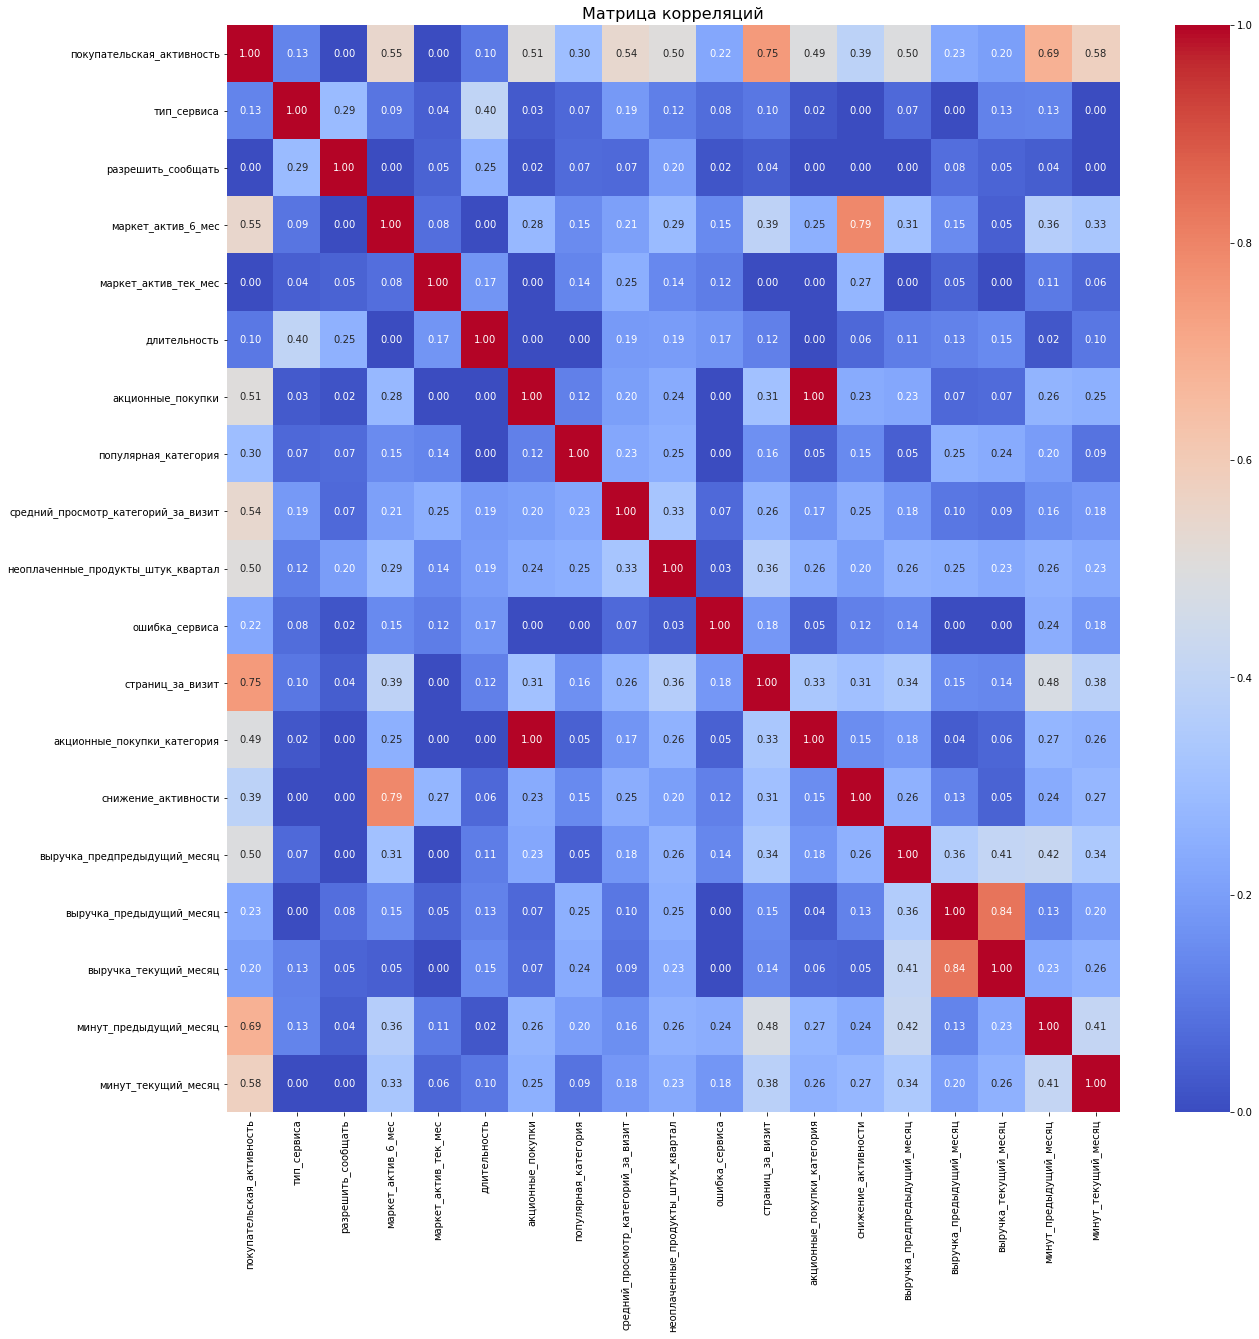

In [69]:
cols = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
    'акционные_покупки', 'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
    'страниц_за_визит', 'выручка_предпредыдущий_месяц',
    'выручка_предыдущий_месяц', 'выручка_текущий_месяц',
    'минут_предыдущий_месяц', 'минут_текущий_месяц'
]

# рассчитываем корреляцию
phik_matrix = market_df.drop('id', axis=1).phik_matrix(interval_cols=cols)

# визуализация
plt.figure(figsize=(20, 20))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляций', fontsize=16)
plt.show()

Самую высокую корреляцию имеют следующие признаки (0.7 <= r <= 1):  
   
страниц_за_визит и покупательская_активность  
выручка_предыдущий_месяц и выручка_текущий_месяц  

In [70]:
market_df.drop(columns=['тип_сервиса',
                        'разрешить_сообщать',
                        'маркет_актив_тек_мес',
                        'длительность',
                        'ошибка_сервиса',], inplace=True)

In [71]:
market_df.columns

Index(['id', 'покупательская_активность', 'маркет_актив_6_мес',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'страниц_за_визит',
       'акционные_покупки_категория', 'снижение_активности',
       'выручка_предпредыдущий_месяц', 'выручка_предыдущий_месяц',
       'выручка_текущий_месяц', 'минут_предыдущий_месяц',
       'минут_текущий_месяц'],
      dtype='object')

Устраним мультиколлинеарность. 

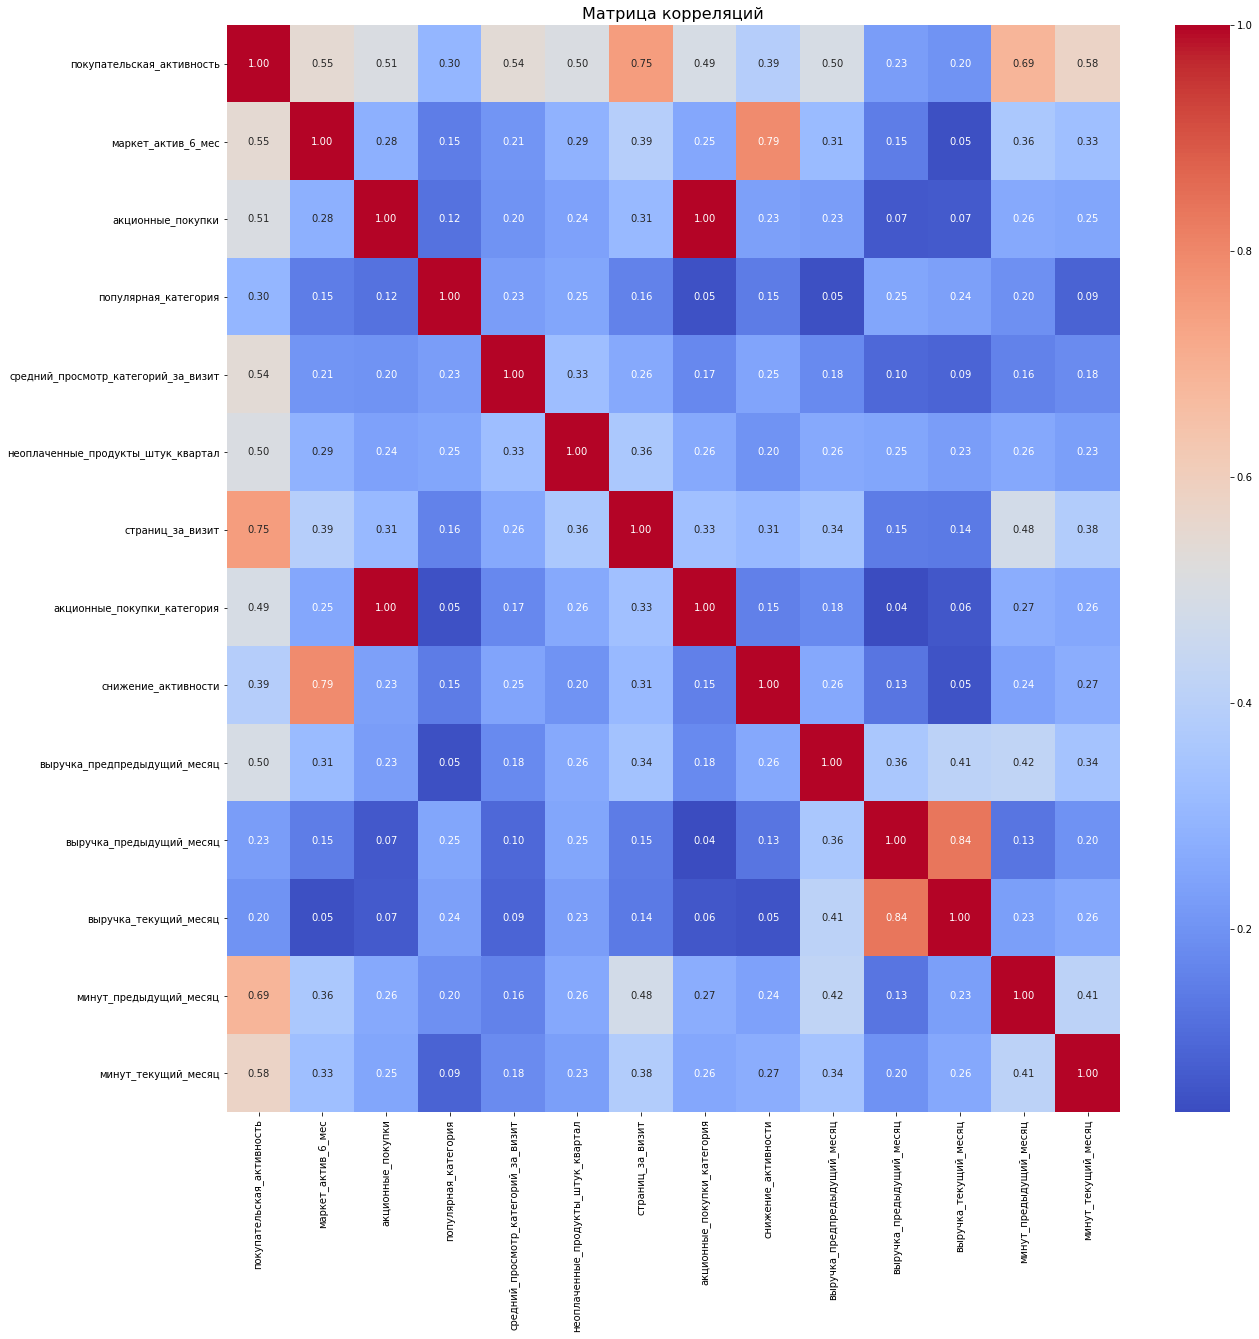

In [72]:
cols = [
    'маркет_актив_6_мес', 'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал', 'страниц_за_визит', 
    'выручка_предпредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц',
    'минут_предыдущий_месяц', 'минут_текущий_месяц'
]

# рассчитываем корреляцию
phik_matrix = market_df.drop('id', axis=1).phik_matrix(interval_cols=cols)

# визуализация
plt.figure(figsize=(20, 20))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляций', fontsize=16)
plt.show()

Согласно коэффициентам корреляции Пирсона, высокой корреляцией считается от 0.7 до 1. Рассмотрим пары признаков.  

покупательская_активность и страниц_за_визит (0.75): чем больше покупательская активность, тем больше страниц просматривает пользователь за визит  
акционные_покупки и акционные_покупки_категория (1.00): категории формируются на основе интервалов значений  
выручка_предыдущий_месяц и выручка_текущий_месяц (0.84): не происходило резкого спада или роста выручки 

### Вывод

- Взаимосвязь покупательской активности и активности на сайте: Высокая корреляция (0.75) между этими признаками указывает на то, что клиенты, проявляющие большую покупательскую активность, проводят больше времени на сайте, исследуя предложения. Это говорит о необходимости оптимизации пользовательского опыта, чтобы увеличить вовлеченность и продажи.  
- Корреляция между акционными покупками и выручкой низкая. Клиенты не реагируют на скидки или специальные предложения, что не приводит к значительному увеличению доходов. Бизнесу стоит уделить больше внимания разработке маркетинговых кампаний. 

## Использование пайплайнов

Разделим данные на выборки. 

In [73]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X = market_df.drop(['id', 'покупательская_активность'], axis=1)
y = market_df['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

X_train.shape, X_test.shape

((972, 13), (325, 13))

### Пайплайн для подготовки данных

In [74]:
# создаём списки с названиями признаков

ohe_columns = ['популярная_категория']
ord_columns = ['акционные_покупки_категория']
num_columns = [
    'маркет_актив_6_мес',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'страниц_за_визит',
    'выручка_предпредыдущий_месяц',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц'
]

In [75]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE

ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop=None, handle_unknown='ignore', sparse=False)
        )
    ]
)

In [76]:
# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE

ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['низкая', 'высокая'],
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)


In [77]:
# cоздаём пайплайн для подготовки признаков из списка num_columns
# StandardScaler + MinMaxScaler

num_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('minmax', MinMaxScaler())
])

In [78]:
# создаём общий пайплайн для подготовки данных

preprocessor = ColumnTransformer([
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

### Пайплайн для моделей

In [79]:
pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [80]:
param_grid = [
    
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5) 
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5)   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5), 
    }, 
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True)],
        'models__kernel': ['linear', 'rbf']
    }
]

In [81]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent'...
    

### Вывод

Лучше всего показала себя логистическая регрессия с метрикой 0.90 на тренировочной выборке и 0.93 на тестовой. Модель хорошо обобщает закономерности на новых данных, так как её качество на тесте даже немного выше, чем на трейне.  

## Анализ важности признаков

  0%|          | 0/10 [00:00<?, ?it/s]

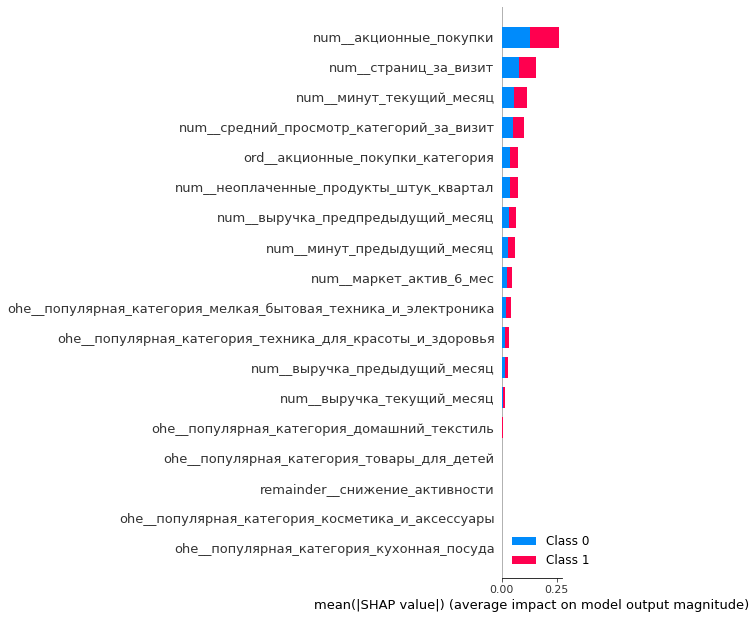

In [86]:
COUNT = 10  

def preprocess_data(preprocessor, X):
    processed_X = preprocessor.transform(X)
    
    ohe_encoder = preprocessor.named_transformers_['ohe'].named_steps['ohe']
    ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(ohe_columns)
    
    remainder_feature_names = preprocessor.get_feature_names_out()

    all_feature_names = remainder_feature_names

    return pd.DataFrame(processed_X, columns=all_feature_names)

best_model = randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

X_train_preprocessed_df = preprocess_data(preprocessor, X_train)
X_test_preprocessed_df = preprocess_data(preprocessor, X_test)

X_train_smpl = shap.sample(X_train_preprocessed_df, COUNT, random_state=RANDOM_STATE)
X_test_smpl = shap.sample(X_test_preprocessed_df, COUNT, random_state=RANDOM_STATE)

explainer = shap.KernelExplainer(best_model.predict_proba, X_train_smpl)

shap_values = explainer.shap_values(X_test_smpl)
shap.summary_plot(shap_values, X_test_smpl)

Ключевые признаки:

- "акционные_покупки" – является наиболее важным признаком. 
- "страниц_за_визит" – чем больше страниц просматривает пользователь, тем выше вероятность его высокой активности.
- "минут_текущий_месяц" 

Различные категории популярных товаров (например, мелкая_бытовая_техника_и_электроника, домашний_текстиль) имеют сравнительно небольшое влияние на прогнозируемый показатель активности => сам факт предпочтения определенных товарных категорий менее важен, чем общее поведение пользователя (количество страниц, время на сайте, участие в акциях). Однако, техника является самым востребуемым продуктом. 

## Сегментация

Сегмент, выбранный для анализа - группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

In [120]:
def preprocess_data(market, market_money, market_time, money):
    # объединение данных по 'id'
    df = market.merge(market_money, on='id', how='left')
    df = df.merge(market_time, on=['id', 'период'], how='left')
    df = df.merge(money, on='id', how='left')
    
    # вычисляем динамику выручки и минут
    df['выручка_изменение'] = df.groupby('id')['выручка'].pct_change()
    df['минут_изменение'] = df.groupby('id')['минут'].pct_change()
    
    df.dropna(subset=['выручка_изменение', 'минут_изменение'], inplace=True)
    
    return df

In [121]:
def segment_customers(df, threshold=-0.1, top_n=100):
    # threshold -порог падения активности (отрицательное значение)
    # top_n - количество клиентов с наибольшей прибылью
    declining_customers = df[(df['выручка_изменение'] < threshold) & (df['минут_изменение'] < threshold)]
    top_profitable = declining_customers.nlargest(top_n, 'Прибыль')
    return top_profitable

In [122]:
def plot_analysis(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['выручка_изменение'], bins=30, kde=True)
    plt.title('Распределение изменения выручки')
    plt.xlabel('Изменение выручки')
    plt.ylabel('Частота')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Прибыль'])
    plt.title('Распределение прибыли выделенного сегмента')
    plt.show()

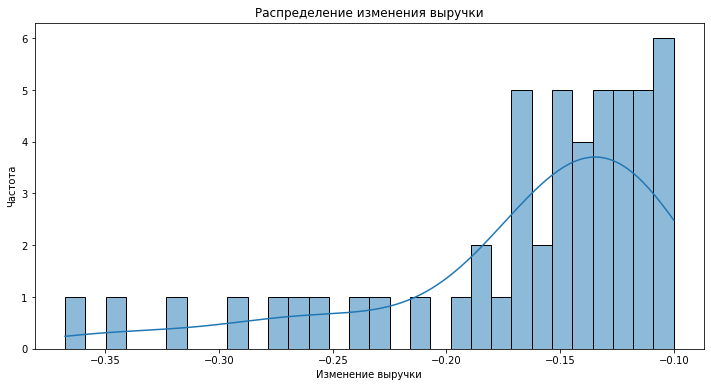

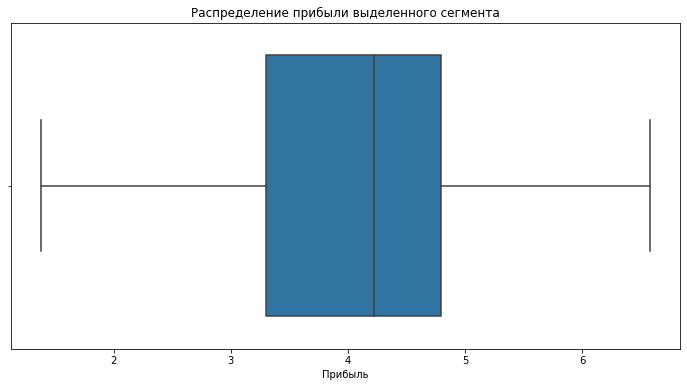

In [123]:
df = preprocess_data(market, market_money, market_time, money)
segmented_customers = segment_customers(df)
plot_analysis(segmented_customers)

Из гистограммы (распределение изменения выручки) видно, что:  
    
- Большинство значений сконцентрированы в диапазоне от -0.2 до -0.1, что указывает на умеренное снижение выручки у основной массы клиентов.  
- Встречаются отдельные клиенты с более резким снижением (до -0.35), но их значительно меньше.  

Из боксплота (распределение прибыли сегмента):

- Распределение прибыли относительно равномерное, без значительных выбросов.
- Медиана прибыли находится в районе 4, что говорит о том, что у большинства клиентов прибыль выше среднего уровня.

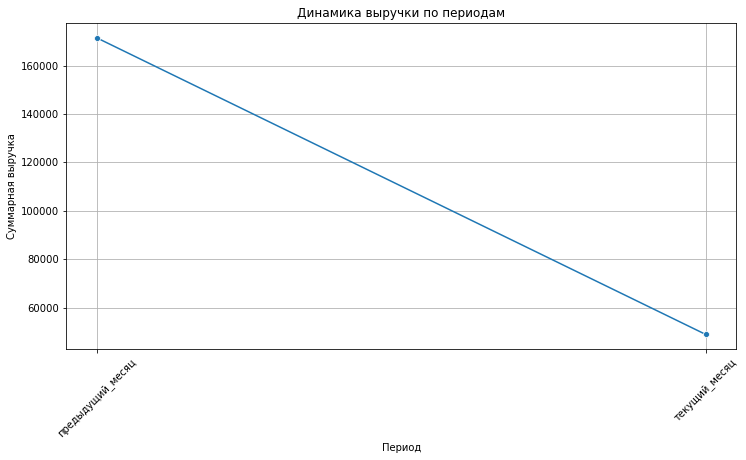

In [125]:
revenue_trend = segmented_customers.groupby('период')['выручка'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='период', y='выручка', data=revenue_trend, marker='o')
plt.title('Динамика выручки по периодам')
plt.xlabel('Период')
plt.ylabel('Суммарная выручка')
plt.xticks(rotation=45)
plt.grid()
plt.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


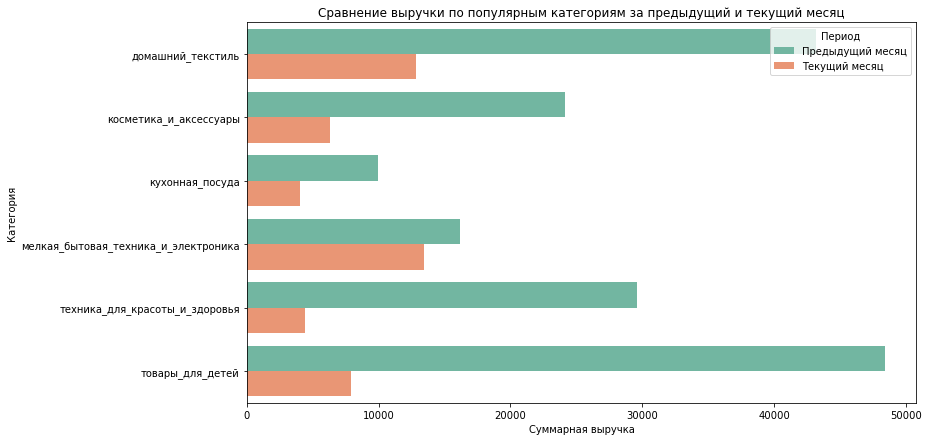

In [126]:
previous_month_data = segmented_customers[segmented_customers['период'] == 'предыдущий_месяц']
current_month_data = segmented_customers[segmented_customers['период'] == 'текущий_месяц']

previous_month_data['период_категория'] = 'Предыдущий месяц'
current_month_data['период_категория'] = 'Текущий месяц'

combined_data = pd.concat([previous_month_data[['выручка', 'популярная_категория', 'период_категория']],
                           current_month_data[['выручка', 'популярная_категория', 'период_категория']]])

category_analysis = combined_data.groupby(['популярная_категория', 'период_категория']).agg({'выручка': 'sum'}).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='выручка', y='популярная_категория', hue='период_категория', data=category_analysis, palette='Set2')
plt.title('Сравнение выручки по популярным категориям за предыдущий и текущий месяц')
plt.xlabel('Суммарная выручка')
plt.ylabel('Категория')
plt.legend(title='Период', loc='upper right')
plt.show()

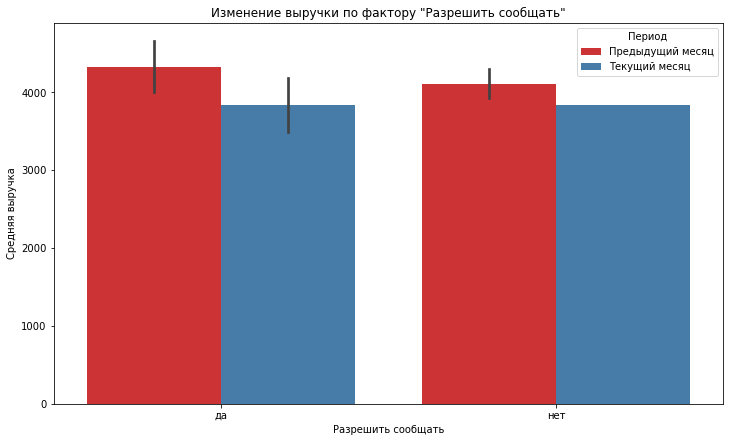

In [127]:
combined_data = pd.concat([previous_month_data[['выручка', 'разрешить_сообщать', 'акционные_покупки_категория', 'период_категория']],
                           current_month_data[['выручка', 'разрешить_сообщать', 'акционные_покупки_категория', 'период_категория']]])


revenue_analysis = combined_data.groupby(['разрешить_сообщать', 'акционные_покупки_категория', 'период_категория']).agg({'выручка': 'mean'}).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='разрешить_сообщать', y='выручка', hue='период_категория', data=revenue_analysis, palette='Set1')
plt.title('Изменение выручки по фактору "Разрешить сообщать"')
plt.xlabel('Разрешить сообщать')
plt.ylabel('Средняя выручка')
plt.legend(title='Период', loc='upper right')

plt.show()

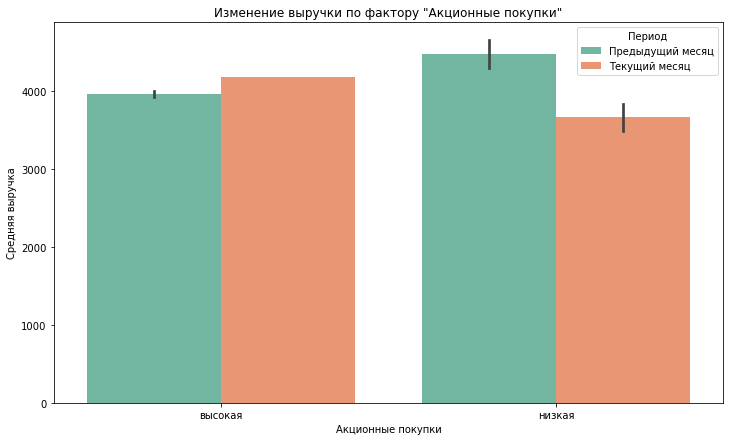

In [128]:
plt.figure(figsize=(12, 7))
sns.barplot(x='акционные_покупки_категория', y='выручка', hue='период_категория', data=revenue_analysis, palette='Set2')
plt.title('Изменение выручки по фактору "Акционные покупки"')
plt.xlabel('Акционные покупки')
plt.ylabel('Средняя выручка')
plt.legend(title='Период', loc='upper right')
plt.show()

## Вывод

**Задачами этого проекта были:**

- Построить модель для прогнозирования вероятности снижения покупательской активности клиентов.
- Выполнить сбор, предобработку и исследовательский анализ данных.
- Обучить и сравнить несколько моделей классификации, выбрать лучшую.
- Провести анализ значимости признаков и выявить ключевые факторы.
- Выполнить сегментацию клиентов и предложить меры для повышения их активности.  

**Описание данных**

Исследование проводилось на основе следующих датасетов:

market_file.csv – данные о поведении покупателей на сайте, их коммуникациях с магазином и продуктовом поведении.
market_money.csv – информация о выручке, полученной от каждого клиента за различные периоды.
money.csv – данные о средней ежемесячной прибыли магазина от каждого покупателя.
market_time.csv - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода. 

Основные признаки включали:

- Покупательскую активность (целевой признак).
- Информацию о маркетинговых коммуникациях.
- Длительность регистрации клиента на сайте.
- Долю акционных покупок.
- Популярные категории товаров.
- Количество просмотренных страниц и категорий за визит.
- Число неоплаченных товаров в корзине.
- Число сбоев в работе сервиса.
- Данные о выручке за разные периоды.  

**Поиск лучшей модели**

Для предсказания вероятности снижения покупательской активности были обучены и протестированы несколько моделей классификации. В итоге лучшей оказалась логистическая регрессия со следующими параметрами: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent'...
                                                  ['маркет_актив_6_мес',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'страниц_за_визит',
                                                   'выручка_предпредыдущий_месяц',
                                                   'выручка_предыдущий_месяц',
                                                   'выручка_текущий_месяц',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц'])])),
                ('models',
                 LogisticRegression(C=2, penalty='l1', random_state=42,
                                    solver='liblinear'))])
Метрика лучшей модели на тренировочной выборке: 0.9000242722060904
Метрика ROC-AUC на тестовой выборке: 0.9252527684159846

Метрики модели:  

ROC-AUC на тренировочной выборке: 0.9000  
ROC-AUC на тестовой выборке: 0.9253  

**Ключевые факторы, влияющие на активность клиентов:**

1. Акционные покупки – основной фактор, влияющий на снижение активности. Покупатели склоняются к тому, чтобы игнорировать акции на сайте. 
2. Количество просмотренных страниц за визит – клиенты с высокой активностью изучают больше страниц.
3. Время, проведенное на сайте – важный признак.
4. Популярные категории товаров – менее значимый фактор, но техника остается востребованной.  

**Дополнительные предложения для наиболее прибыльного сегмента:**

- Увеличение персонализированных предложений и лояльных программ для ценных клиентов.
- Маркетинговые предложения должны поступать реже и ненавязчиво
- Сделать упор на развитие акционных предложений, которые будут заинтересовывать покупатеелй, тк сейчас они склонны их игнорировать
- Стараться уменьшать количество ошибок на сайте
- Сделать упор на домашний текстиль, товары для красоты и здоровья

Исследование показало, что снижение покупательской активности может быть связано с неудовлетворенностью пользователей или их игнорированием акционных покупок. Построенная модель логистической регрессии демонстрирует высокий уровень предсказательной способности. Выделенный  кластер клиентов требует особого внимания, так как его покупательская активность может снижаться, несмотря на высокую прибыльность. 
